In [3]:
from models.collaborative_filter import CollaborativeFilteringMF
import pandas as pd
import numpy as np
import torch

cf = CollaborativeFilteringMF(
    train_path="data/processed_data/train_processed_data_mf.csv",
    test_path="data/processed_data/test_processed_data_mf.csv",
)

cf.load_model("model_ckpts/collaborative_filter/mf_final.pt")

test_df = pd.read_csv("data/processed_data/test_processed_data_mf.csv")
u = test_df["msno"].map(cf.user2idx).to_numpy()
i = test_df["song_id"].map(cf.item2idx).to_numpy()
y = test_df["target"].to_numpy()

pred = cf.predict_pairs(u, i)


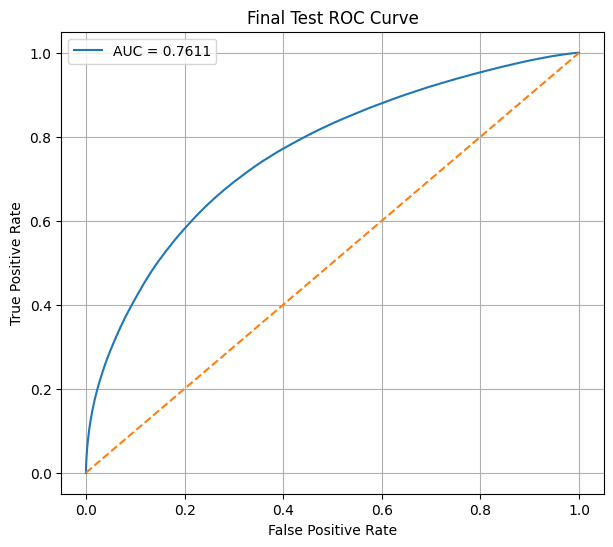

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, pred)
final_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {final_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final Test ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("images/models/collaborative_filter/final_auc_curve.png", dpi=150)
plt.show()
